# Utilização elementar da biblioteca

A função mais elementar desta biblioteca de módulos `python` é a computação de perfis transversais de feixes ópticos. Dado que as máquinas são capazes de computar o feixe óptico apenas em estratos finitos de espaço (dado que a memória de qualquer computador é limitada), iremos primeiramente computar a região do espaço em que serão feitas nossas análises.

In [1]:
# módulo numpy: utilizado na construção e controle de matrizes
import numpy as np

# construção da região simulada do espaço
x = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo x
y = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo y

X, Y = np.meshgrid(x, y);           # malha de pontos do plano X, Y

agora, para criarmos feixes ópticos, importamos o módulo `optical.field` dessa biblioteca (notando que `optics/` está no diretório pai do pai de `examples/basic/` de modo que precisaremos primeiramente mudar de diretório).

In [2]:
# retornar sem mensagens (-q = quiet) ao diretório raíz
%cd -q ../../

# importa o módulo beam dessa biblioteca
import optical.beam as beam

## Construção de um feixe óptico genérico

Feixes ópticos são computados pelo construtor `optical.beam.create()` como uma matriz bidimensional (`numpy.ndarray`) de entradas complexas (`complex`) - de modo que funções universais (`numpy.ufunc`) disponíveis nas bibliotecas `numpy` e `scipy` podem ser utilizadas nesses.

> `optical.beam.create(F, region = (X, Y))`
>
>> computa o feixe de envoltória `F(x, y)` nos pontos de `region` (malha de pontos com as coordenadas da janela computacional).
>
> parâmetros opcionais:
>
>> `center` = `(x_c, y_c)`
>>
>> par de pontos do espaço para onde a origem de coordenadas será transladada na computação.
>
>> `phase`
>>
>> valor ou matriz bidimensional com valores da fase.
>
>> `incidence` = `beam.incidence(k, beamAng = (phi_x, phi_y))`
>>
>> vetor de onda de incidência do campo com respeito ao plano transverso de propagação.
>
>> `normalize` = `True` ou `False`
>>
>> condição para normalização da intensidade do campo.
>

In [3]:
# exemplo de criação de feixe óptico com envelope de onda genérico
Beam = beam.create(
    F = lambda x, y: np.exp(-np.sqrt(x**2 + y**2)/20.0) * np.sin(x) * np.sin(y),
    region = (X, Y),
    center = (-25, 5),
    phase = np.pi * np.sqrt(X**2 + Y**2),
    incidence = beam.incidence(k = 1.0, beamAng = (0.0, 45.0)),
    normalize = True
);

### Computando propriedades do feixe óptico ao longo do plano transversal

Dado que a envoltória do feixe é complexa, algumas propriedades são inerentemente importantes para compreender o comportamento da luz, sendo as mais elementares a intensidade $|U(x, y)|^2$ e a fase $\operatorname{arg}(U(x,y))$ para um $z$ fixado.

In [4]:
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

##### Perfil transversal de intensidade do feixe

Para esboçarmos o perfil de intensidade do feixe ao longo do plano transversal apenas criamos uma figura do tipo `plotly.graph_objects.Heatmap`.

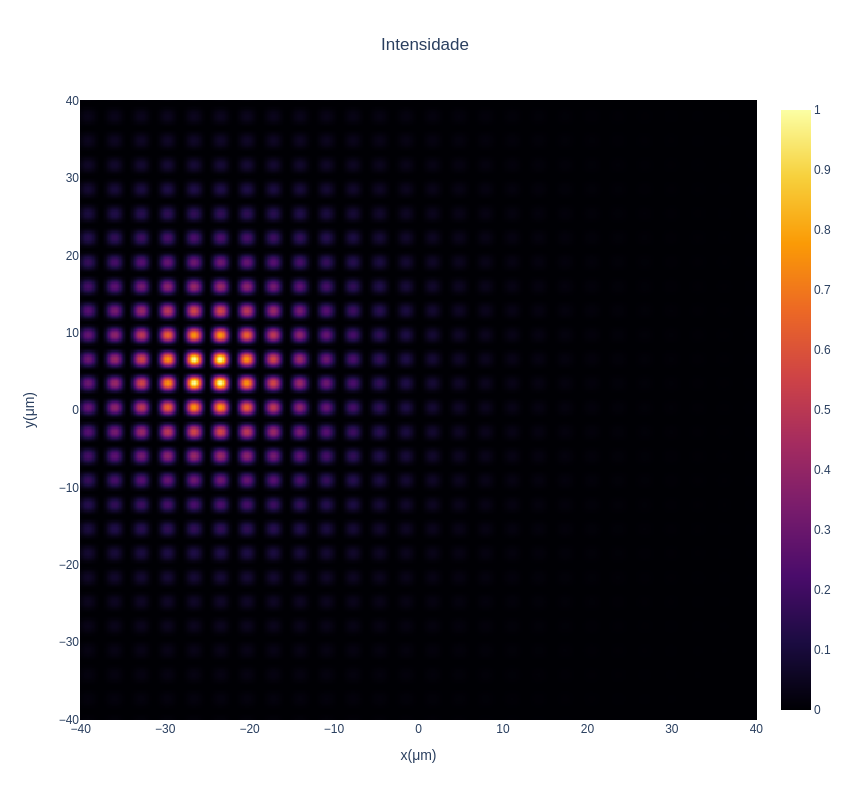

In [7]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(Beam) ** 2,
        colorscale = 'inferno'
    ),
    layout = go.Layout(
        title = 'Intensidade',
        title_x = 0.5,              # centraliza o título horizontalmente
        xaxis = dict(title = 'x(μm)'),
        yaxis = dict(title = 'y(μm)'),
        width = 850,
        height = 800
    )
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

##### Perfil transversal de fase do feixe

Para esboçarmos o perfil de fase do feixe ao longo do plano transversal apenas criamos uma figura do tipo `plotly.graph_objects.Heatmap`.

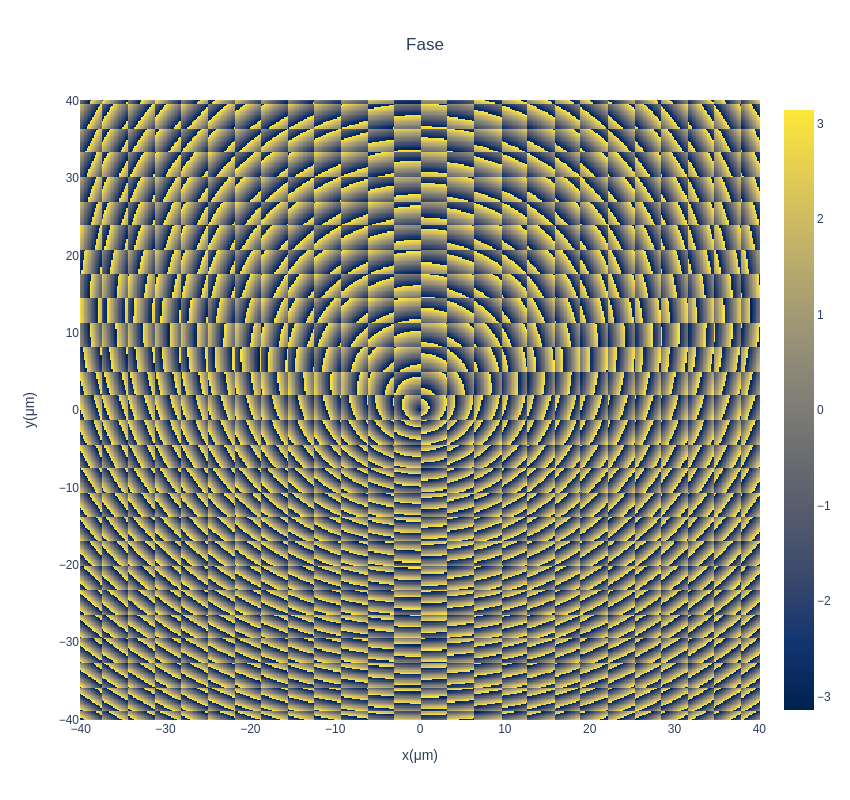

In [8]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(Beam),
        colorscale = 'cividis'
    ),
    layout = go.Layout(
        title = 'Fase',
        title_x = 0.5,              # centraliza o título horizontalmente
        xaxis = dict(title = 'x(μm)'),
        yaxis = dict(title = 'y(μm)'),
        width = 850,
        height = 800
    )
);

phaseGraph.show("png");             # mostrar gráfico de fases